# LSA Clustering on my Blog Posts

This is an example of the LSA clustering. This is a tehniques, that I wanted to try ever since I found out about it during the Grounded cognition class. Now, when way too much time had passed, and I am cleaning my files on the computer, I am finally trying to do it. 

These are the assumptions of the method:
+ langauge describes the word
+ co-ocurances are important
+ meaning can be represented as a vector

Negative sides:
+ ignores word order
+ ignores poliysemy (multiple meanings of a word)
+ not grounded in perception/action
+ can't capture creativity in the language

I am going to try and cluster the blog posts that I had written until 19. of February 2019. 

## Imports

In [180]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import pandas
import numpy
import matplotlib.pyplot as plt

## Getting the Data

I have put the markdown files of all my posts in the data folder. There are 547 files listed there (which means, I did quite some writting in that time). Not all of them were originally written from my blog, but they are all my writtings. 

In [160]:
all_files = os.listdir("data")

In [161]:
len(all_files)

547

## Building the Model

Next I created the mode, following this question: https://stackoverflow.com/questions/30590881/python-lsa-with-sklearn

First we get the word vector.

In [162]:
word_vector = CountVectorizer(input='filename',strip_accents='ascii')

In [163]:
word_vector_result = word_vector.fit_transform([os.path.join("data", filename) for filename in all_files]).toarray()

There are 13 734 different words used. 

In [164]:
len(word_vector.get_feature_names())

13734

Next, the words that are used get corrected by frequency. 

In [165]:
word_freq = TfidfTransformer()

In [166]:
word_freq_result = word_freq.fit_transform(dtMatrix).toarray()

And next we do the LSA. The LSA is just a modified SVD. In this example, I will try to get 5 groups from my blogs. This is a lot less then they recomend. 

In [167]:
model = TruncatedSVD(n_components = 10)

In [168]:
model_result = model.fit_transform(tfidfMatrix)

In [169]:
final_data = pandas.DataFrame(model_result)

## Results

So this is how the results look like. 

In [170]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.121097,-0.046699,-0.008465,0.124442,0.028540,0.074604,-0.047604,0.039494,-0.019425,-0.023659
1,0.511444,-0.171512,-0.036696,-0.092837,0.237517,0.027576,0.026673,-0.125640,0.069481,-0.096000
2,0.266740,-0.085150,-0.024219,-0.012151,-0.019944,-0.030245,-0.037541,-0.048234,-0.092022,0.107726
3,0.512284,0.507296,-0.177583,0.030264,-0.068668,0.069429,0.080944,-0.031136,-0.029869,-0.031501
4,0.224643,-0.042716,-0.028080,-0.035988,-0.051262,0.027667,0.017532,0.080553,-0.036661,-0.010972


Next I am going to try and see, how representitive are the groups. I will create the groups by putting each document in the group they have the higest score for and then I will see, which documents in each group have the higest score. (I have no idea, if this is how it is done)

(I have no idea, if this is how it is done)

In [173]:
all_elements = dict()

In [174]:
for i in final_data.index:
    current = numpy.array(final_data.iloc[i])
    number = numpy.argmax(current)
    if not number in all_elements:
        all_elements[number] = []
    all_elements[number].append([i, current[number]])

In [175]:
for element, data in all_elements.items():
    print(element, [all_files[i] for i in pandas.DataFrame(data).nlargest(5, 1).index])
    print("-----------------")

3 ['how-kurokone-was-recruited.md', 'the-constant-attention.md', 'do-you-use-self-checkouts.md', 'creativity-and-jungs-functions-eight-ways-to-be-creative.md', 'the-tension-and-the-conversation.md']
-----------------
0 ['uncomplicating-the-love-misunderstanding-3-there-is-nothing-wrong-here-right-gintama-fanfiction.md', 'why-people-mistakenly-think-they-are-ambiverts.md', 'dont-piss-jarvis-off-mcu-fanfiction.md', 'fairy-stage-fiction.md', 'social-media-is-making-us-one-sided.md']
-----------------
1 ['mbti-typing-austria-country-entj.md', 'the-aptx-murder-investigation-bbc-sherlock-detective-conan-fanfiction.md', 'do-you-use-self-checkouts.md', 'creativity-and-jungs-functions-eight-ways-to-be-creative.md', 'how-they-found-a-cat.md']
-----------------
2 ['how-to-find-another-persons-mbti-type-the-big-five.md', 'are-we-important.md', 'video-of-my-evolving-music-in-python.md', 'do-you-use-self-checkouts.md', 'your-couch-is-more-comfortable-mcu-fanfiction.md']
-----------------
8 ['creativ

Well, none of these make much since to me, so maybe I did it the wrong way?

Another potential way would be, to check each group and see the most representitive of this group, even if they are even more representitive of another group. 

In [177]:
for j in range(10):
    print(j, [all_files[i] for i in final_data.nlargest(5, j).index])

0 ['my-first-mbti-typing-john-kennex-almost-human-istp.md', 'a-quick-guide-to-finding-your-mbti-type.md', 'creativity-and-jungs-functions-eight-ways-to-be-creative.md', 'thinker-and-feeler-vs-the-goal-of-feeling-good.md', 'how-jungs-personality-functions-can-help-you-enjoy-your-public-speaking.md']
1 ['i-dont-want-it-gintama-fanfiction.md', 'uncomplicating-the-love-misunderstanding-1-how-do-personal-boundaries-work-gintama-fanfiction.md', 'where-i-came-from.md', 'past-experiences-become-todays-knowledge-gintama-fanfiction.md', 'assault-and-bloodbath-gintama-fanfiction.md']
2 ['addiction-to-chocolate.md', 'why-the-flowers-fiction.md', 'your-couch-is-more-comfortable-mcu-fanfiction.md', 'usb-answer-fiction.md', 'secretarys-secret-fiction.md']
3 ['my-drawing-lessons-2018-11-20.md', 'my-drawing-lessons-2018-11-15.md', 'my-drawing-lessons-2019-01-08.md', 'my-drawing-lessons-2018-11-09.md', 'my-drawing-lessons-2019-01-10.md']
4 ['mbti-typing-eric-foreman-house-md-istj.md', 'mbti-typing-rober

Well, these results make a lot more sense. The zeroth are MBTI posts. The first is Gintama fanfiction. The second is stories (fiction and fanfiction), the third is drawing, the fourth is MBTI typings and analysis of characters (though, some of these are also in general MBTI), the fifth is programming, the eight is recepies and ninth is learning. 

These are not all the groups of content on my blog, but they are at least right. Not sure about the sixth and seveth group. I can't see the connection there. But mostly, they are right.

So I will assume, that this is the correct way to do it. 

## Clustering

Lets first see, how many clusters do we need. 

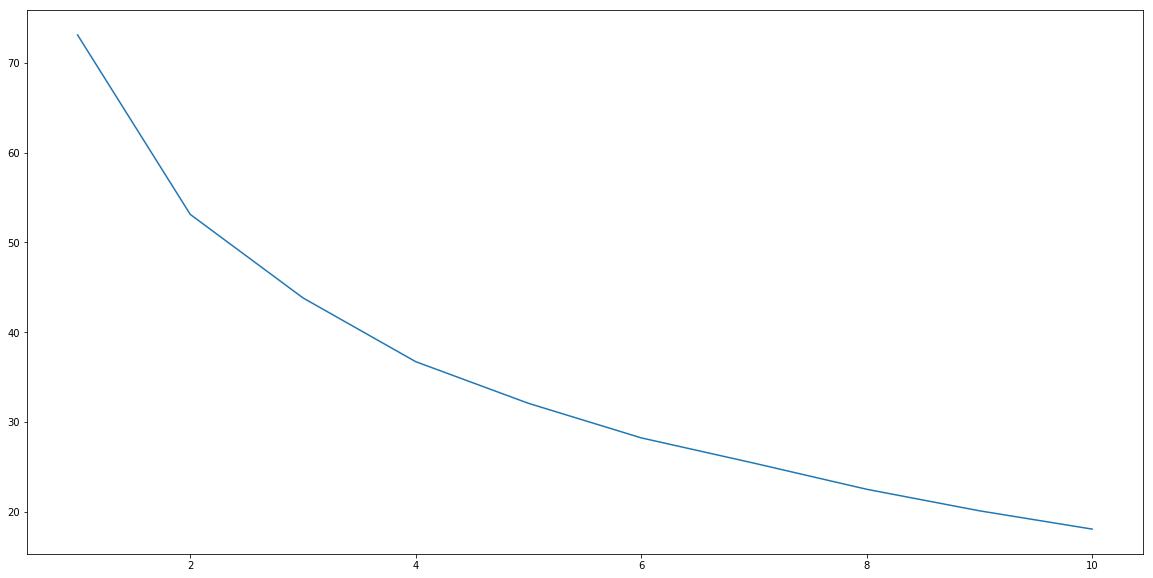

In [203]:
plt.figure(figsize=(20, 10))
interia = []
for i in range(1, 11):
    model_i = KMeans(n_clusters = i, init = 'k-means++')
    model_i.fit(final_data)
    interia.append(model_i.inertia_)
plt.plot(range(1, 11), interia)

If there is any elbow, it is at 2. Maybe at 4. Still, none of them are big enough, so I am going to be using 5. It is just me learning how to use LSA.

In [204]:
model_clustering = KMeans(n_clusters = 5, init = 'k-means++')
model_clustering.fit(final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Next, I am putting the cluster centers in the table. In the first table, the ones that are higher than 0.2 are green and in the second one, the ones that are lower than -0.1 are red. 

In [232]:
model_data = pandas.DataFrame(model_clustering.cluster_centers_)

In [233]:
model_data.style.apply(lambda x: ["background: green" if v > 0.2 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9
0,0.248939,-0.0651318,0.0285674,0.509097,0.136319,-0.191407,0.14767,0.0395201,-0.0391157,0.011923
1,0.256235,-0.0524101,0.0107045,0.0654186,-0.0130649,0.0710633,-0.0688132,-0.0384123,0.0324199,-0.00750139
2,0.506597,-0.118725,-0.0233928,-0.0237554,-0.00283503,-0.012748,0.00847393,0.00813403,-0.00640678,0.00368639
3,0.423091,0.184937,0.347771,-0.0210119,-0.0107358,0.0668381,0.0943203,-0.0343812,-0.0307898,0.00503464
4,0.482724,0.427611,-0.0674379,0.000799421,0.0130038,-0.0200479,-0.0330355,0.0175386,0.00409286,-0.00378107


In [234]:
model_data.style.apply(lambda x: ["background: red" if v < -0.1 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9
0,0.248939,-0.0651318,0.0285674,0.509097,0.136319,-0.191407,0.14767,0.0395201,-0.0391157,0.011923
1,0.256235,-0.0524101,0.0107045,0.0654186,-0.0130649,0.0710633,-0.0688132,-0.0384123,0.0324199,-0.00750139
2,0.506597,-0.118725,-0.0233928,-0.0237554,-0.00283503,-0.012748,0.00847393,0.00813403,-0.00640678,0.00368639
3,0.423091,0.184937,0.347771,-0.0210119,-0.0107358,0.0668381,0.0943203,-0.0343812,-0.0307898,0.00503464
4,0.482724,0.427611,-0.0674379,0.000799421,0.0130038,-0.0200479,-0.0330355,0.0175386,0.00409286,-0.00378107


So what this means is, that all the clusters are in some way connected with MBTI. The zeroth one is not having any programming and the second one is not having any Gintama fanfiction. The zeroth also have some more drawings, just like the third has some more fiction and the forth has some more Gintama fanfiction.